## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

import tensorflow as tf

#自動增長 GPU 記憶體用量的方式，讓程式需要多少記憶體就拿多少
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7629927923722852667
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4941427507
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9100841607233301989
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    #x = x / 255.
    x = x / (x.max()-x.min())
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0716 23:16:07.571105  4748 deprecation_wrapper.py:119] From C:\Users\pablo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 23:16:07.571105  4748 deprecation_wrapper.py:119] From C:\Users\pablo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 23:16:07.571105  4748 deprecation_wrapper.py:119] From C:\Users\pablo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0716 23:16:07.667264  4748 deprecation_wrapper.py:119] From C:\Users\pablo\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 23:16:07.667264  4748 deprecation_wrapper.py:119] From C:\Users\pablo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0716 23:16:07.752008  4748 deprecation.py:323] From C:\Users\pablo\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0716 23:16:07.836661  4748 deprecation_wrapper.py:119] From C:\Users\pablo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 70us/step - loss: 1.9644 - acc: 0.2820 - val_loss: 1.8184 - val_acc: 0.3433
Epoch 2/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.7503 - acc: 0.3721 - val_loss: 1.7152 - val_acc: 0.3976
Epoch 3/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.6444 - acc: 0.4116 - val_loss: 1.6854 - val_acc: 0.4094
Epoch 4/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.5713 - acc: 0.4397 - val_loss: 1.6361 - val_acc: 0.4145
Epoch 5/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.5316 - acc: 0.4544 - val_loss: 1.5166 - val_acc: 0.4560
Epoch 6/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.4881 - acc: 0.4692 - val_loss: 1.4869 - val_acc: 0.4685
Epoch 7/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.4453 - acc: 0.4844 - val_loss: 1.4579 - 

50000/50000 [==============================] - 3s 52us/step - loss: 0.5538 - acc: 0.8014 - val_loss: 2.0250 - val_acc: 0.5055
Epoch 60/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.5515 - acc: 0.8021 - val_loss: 2.0549 - val_acc: 0.5115
Epoch 61/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.5466 - acc: 0.8043 - val_loss: 2.0401 - val_acc: 0.5092
Epoch 62/100
50000/50000 [==============================] - 3s 57us/step - loss: 0.5338 - acc: 0.8094 - val_loss: 2.0428 - val_acc: 0.5144
Epoch 63/100
50000/50000 [==============================] - 3s 56us/step - loss: 0.5101 - acc: 0.8180 - val_loss: 2.0896 - val_acc: 0.5037
Epoch 64/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.5162 - acc: 0.8139 - val_loss: 2.1038 - val_acc: 0.5100ss: 0.5104 - acc: 0.
Epoch 65/100
50000/50000 [==============================] - 3s 56us/step - loss: 0.5093 - acc: 0.8177 - val_loss: 2.1539 - val_acc: 0.4940
Epoch 66/100
50000/5

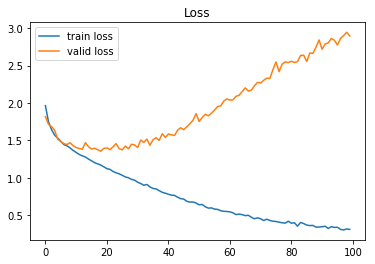

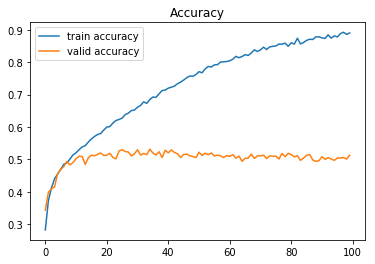

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()